# Import library and read csv

In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
import sklearn.preprocessing as preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, classification_report,roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from functools import partial
from skopt import space
from skopt import gp_minimize
from xgboost import XGBClassifier
import xgboost as xgb

# read csv
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Data inspection

## Data size

In [2]:
# Check the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [3]:
df.shape

(10127, 21)

In [4]:
# Check the columns of the data
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [5]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [6]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Countplot

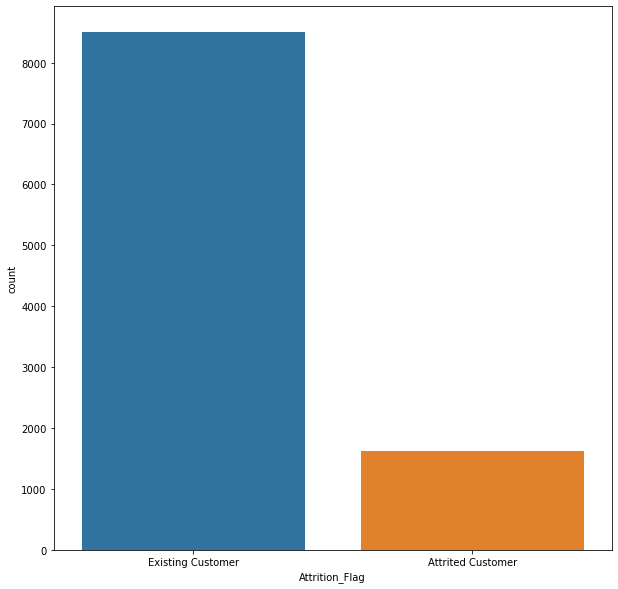

In [7]:
# Display a frequency distribution for Attrition_Flag
plt.figure(figsize=(10, 10))
sns.countplot(x=df['Attrition_Flag'])
plt.show()

In [8]:
# Create a function to generate boxplots
plots = {1: [111], 2: [121,122], 3: [131, 132, 133], 4: [221, 222, 223, 224],
         5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

In [9]:
# Can check out outliers in numerical features
def count_boxplot(x, y, df):
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))

    # i : index, j : item
    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], linewidth=1)
        ax.set_title(j)

    return plt.show()

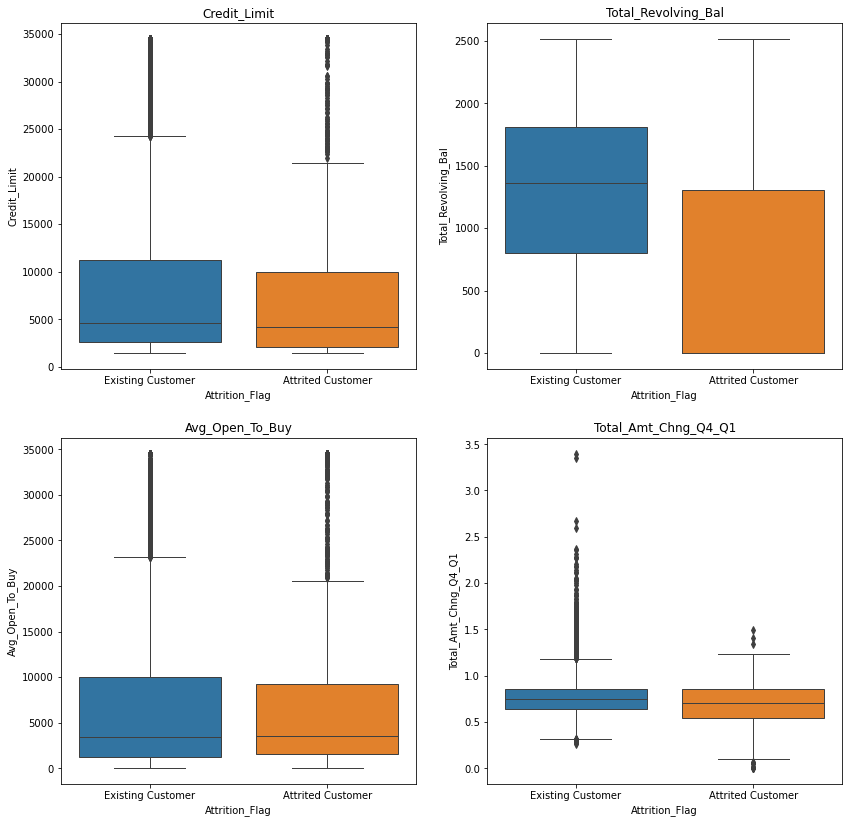

In [10]:
# Generate boxplot
count_boxplot("Attrition_Flag", ["Credit_Limit", "Total_Revolving_Bal",
                                 "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1"], df)

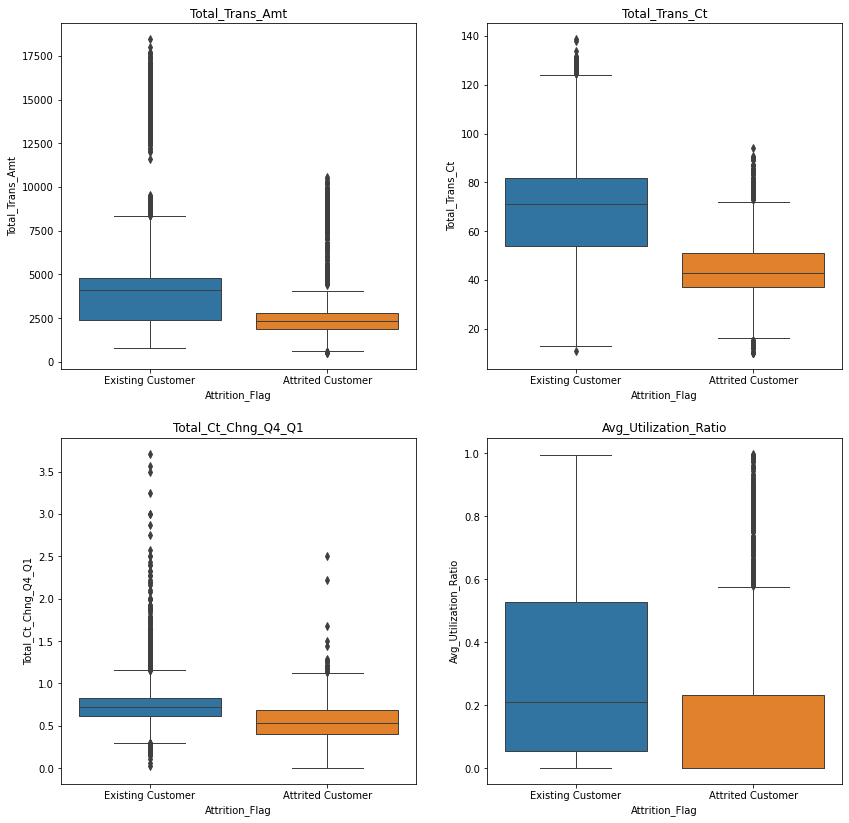

In [11]:
count_boxplot("Attrition_Flag", ["Total_Trans_Amt", "Total_Trans_Ct",
                                 "Total_Ct_Chng_Q4_Q1",  "Avg_Utilization_Ratio"], df)

In [12]:
# categorical
def countplot(x, y, df) :
    rows = int(str(plots[len(y)][0])[0])
    columns = int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns, 7*rows))

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df)
        ax.set_title(j)

    return plt.show()

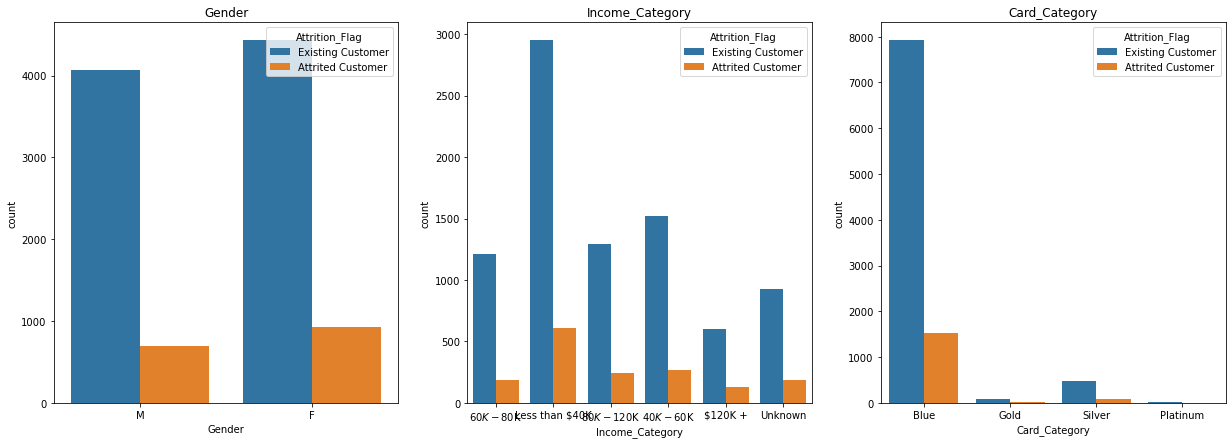

In [13]:
countplot("Attrition_Flag", ["Gender", "Income_Category", "Card_Category"], df)

# Data preprocessing

## Label Encoding

In [14]:
# seprately encode ordinal variables(Income_Category, Card_Category, Attrition_Flag, Education_Level)
Income_Category_map = {'Less than $40K' : 0, '$40K - $60K' : 1, '$60K - $80K' : 2,
                       '$80K - $120K' : 3,'$120K +' : 4,'Unknown' : 5}


Card_Category_map = {'Blue' : 0, 'Silver' : 1, 'Gold' : 2, 'Platinum' : 3}


Attrition_Flag_map = {'Existing Customer': 0,'Attrited Customer' : 1}

Education_Level_map = {'Uneducated' : 0, 'High School' : 1, 'College' : 2, 'Graduate' : 3,
                       'Post-Graduate' : 4, 'Doctorate' : 5, 'Unknown' : 6}

In [15]:
labelencoder = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df.loc[:, i] = labelencoder.fit_transform(df.loc[:, i])

## Feature Engineering

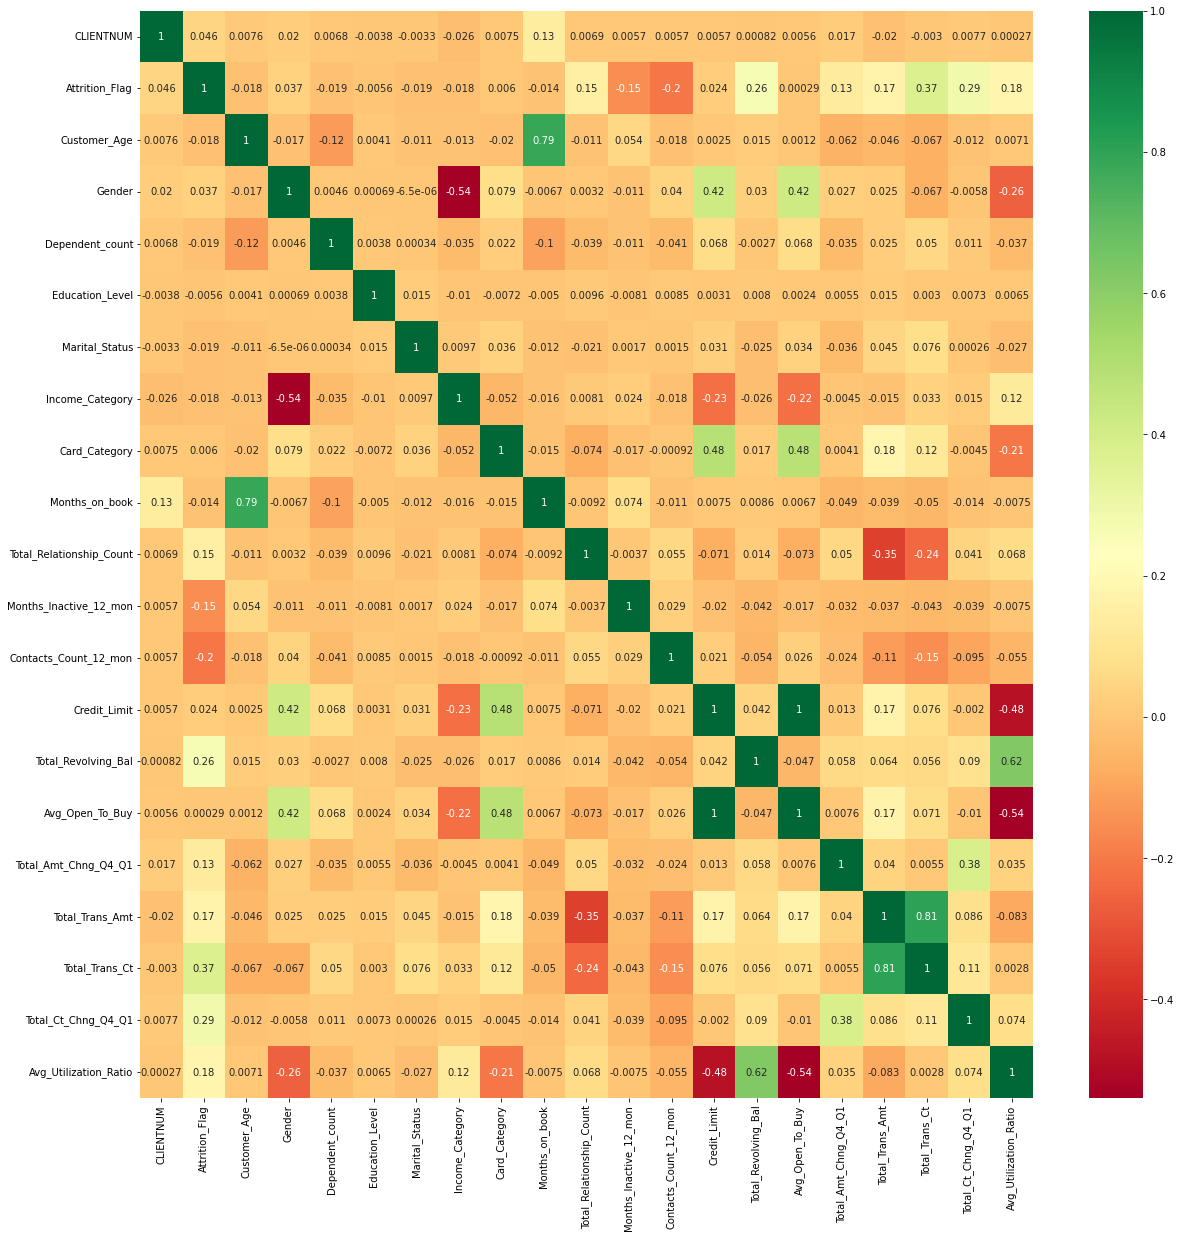

In [16]:
# get correlations of pairs of features in the dataset
corrmat = df.corr() # corr() computes pairwise correlations of features in a Data Frame
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# plot the heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.02714205 0.03040819 0.01673419 0.02481071 0.02314051 0.02196858
 0.02103099 0.00596054 0.02813738 0.06947777 0.0378321  0.04795669
 0.03028445 0.11382189 0.02950168 0.04743749 0.13494999 0.16732767
 0.07531657 0.04676055]


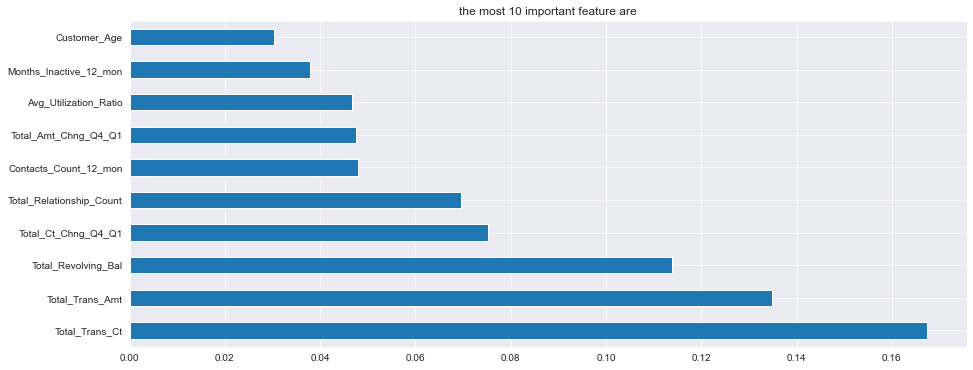

In [17]:
# Feature Selection
plt.rcParams['figure.figsize'] = 15, 6 
sns.set_style("darkgrid")

x = df.drop('Attrition_Flag', axis=1)
y = df.Attrition_Flag


model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('the most 10 important feature are')
plt.show()

In [18]:
new_df_columns = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Revolving_Bal', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Count',
          'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Credit_Limit', 'Attrition_Flag']
new_df = pd.DataFrame(df, columns=new_df_columns)
new_df

,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Contacts_Count_12_mon,Months_Inactive_12_mon,Credit_Limit,Attrition_Flag
0,42,1144,777,1.625,5,1.335,0.061,3,1,12691.0,1
1,33,1291,864,3.714,6,1.541,0.105,2,1,8256.0,1
2,20,1887,0,2.333,4,2.594,0.000,0,1,3418.0,1
3,20,1171,2517,2.333,3,1.405,0.760,1,4,3313.0,1
4,28,816,0,2.500,5,2.175,0.000,0,1,4716.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10122,117,15476,1851,0.857,3,0.703,0.462,3,2,4003.0,1
10123,69,8764,2186,0.683,4,0.804,0.511,3,2,4277.0,0
10124,60,10291,0,0.818,5,0.819,0.000,4,3,5409.0,0
10125,62,8395,0,0.722,4,0.535,0.000,3,3,5281.0,0


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total_Trans_Ct            10127 non-null  int64  
 1   Total_Trans_Amt           10127 non-null  int64  
 2   Total_Revolving_Bal       10127 non-null  int64  
 3   Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 4   Total_Relationship_Count  10127 non-null  int64  
 5   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 6   Avg_Utilization_Ratio     10127 non-null  float64
 7   Contacts_Count_12_mon     10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Attrition_Flag            10127 non-null  int32  
dtypes: float64(4), int32(1), int64(6)
memory usage: 830.9 KB


## Scaling

In [20]:
features_scaling = ['Total_Ct_Chng_Q4_Q1', 'Total_Amt_Chng_Q4_Q1',
                    'Credit_Limit', 'Avg_Utilization_Ratio']
df_features_scaling = pd.DataFrame(new_df, columns=features_scaling)
df_remaining_features = new_df.drop(columns=features_scaling)

In [21]:
def scaling(feature, scale):
    if scale == 'StandardScaling':
        scaler = preprocessing.StandardScaler()
        scaled_feature = scaler.fit_transform(feature)
    elif scale == 'RobustScaling':
        scaler = preprocessing.RobustScaler()
        scaled_feature = scaler.fit_transform(feature)
    elif scale == 'MinMaxScaling':
        scaler = preprocessing.MinMaxScaler()
        scaled_feature = scaler.fit_transform(feature)
    else:
        scaler = preprocessing.MaxAbsScaler()
        scaled_feature = scaler.fit_transform(feature)
        
    df_scaled_features = pd.DataFrame(scaled_feature, columns=features_scaling, index=df_remaining_features.index)
    return df_scaled_features

In [22]:
df_scaled_features = scaling(df_features_scaling,'MaxAbsScaling')
df_maxabs_scaled_data = pd.concat([df_remaining_features, df_scaled_features], axis=1)
print('*****MaxAbs Scaling*****\n')
df_maxabs_scaled_data.head()

*****MaxAbs Scaling*****



,Total_Trans_Ct,Total_Trans_Amt,Total_Revolving_Bal,Total_Relationship_Count,Contacts_Count_12_mon,Months_Inactive_12_mon,Attrition_Flag,Total_Ct_Chng_Q4_Q1,Total_Amt_Chng_Q4_Q1,Credit_Limit,Avg_Utilization_Ratio
0,42,1144,777,5,3,1,1,0.437534,0.392994,0.367685,0.061061
1,33,1291,864,6,2,1,1,1.000000,0.453636,0.239193,0.105105
2,20,1887,0,4,0,1,1,0.628164,0.763615,0.099027,0.000000
3,20,1171,2517,3,1,4,1,0.628164,0.413600,0.095984,0.760761
4,28,816,0,5,0,1,1,0.673129,0.640271,0.136632,0.000000


## Split train and test data

In [23]:
X = df_maxabs_scaled_data.drop('Attrition_Flag', axis=1)
y = df_maxabs_scaled_data['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify=y, random_state=42 ,shuffle=True)

# Data analysis & Evaluation

## Define a function that plots the confusion matrix

In [24]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["Attrited Customer", "Existing Customer"], 
    cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["Attrited Customer", "Existing Customer"], 
    cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

## Define a function that plots roc curve

In [25]:
def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr,tpr,label = f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()

    return print(f'AUC Score (ROC) : {roc_auc_score(y_test, y_pred_prob)}\n')

## Define a function Model and Cross Validation Score

In [26]:
def compute_CV(X, y, model, k):
    kfold = KFold(n_splits=k)
    auc_scores = []
    i = 0
    
    for index in kfold.split(X = X, y = y):
        
        train_index, val_index = index[0], index[1]
        
        i += 1 
        X_train = X.iloc[train_index, :]
        y_train = y[train_index]
        X_val = X.iloc[val_index, :]
        y_val = y[val_index]
        
        model.fit(X_train, y_train)
        y_predict = model.predict_proba(X_val)
        y_predict_prob = y_predict[:, 1]
        
        auc_score = roc_auc_score(y_val, y_predict_prob)
        print(f'AUC Score of {i} Fold is : {auc_score}')
        auc_scores.append(auc_score)
    print('-----------------------------------------------')
    print(f'Average AUC Score of {k} Folds is : {np.mean(auc_scores)}')

### KNN classifier

AUC Score of 1 Fold is : 0.8696208928499012
AUC Score of 2 Fold is : 0.8201021528001253
AUC Score of 3 Fold is : 0.9070630292832461
AUC Score of 4 Fold is : 0.9279900551927884
AUC Score of 5 Fold is : 0.5935360463344002
-----------------------------------------------
Average AUC Score of 5 Folds is : 0.8236624352920924


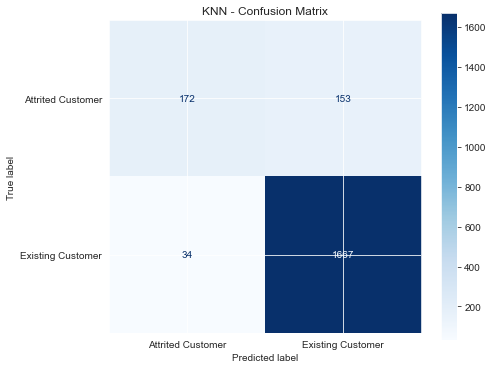

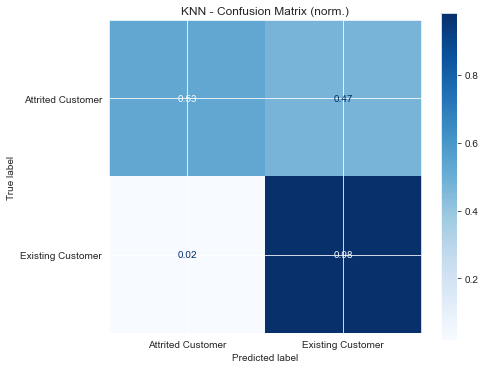

Accuracy Score Test: 0.9076999012833169
Accuracy Score Train: 0.9159363041599803 (as comparison)



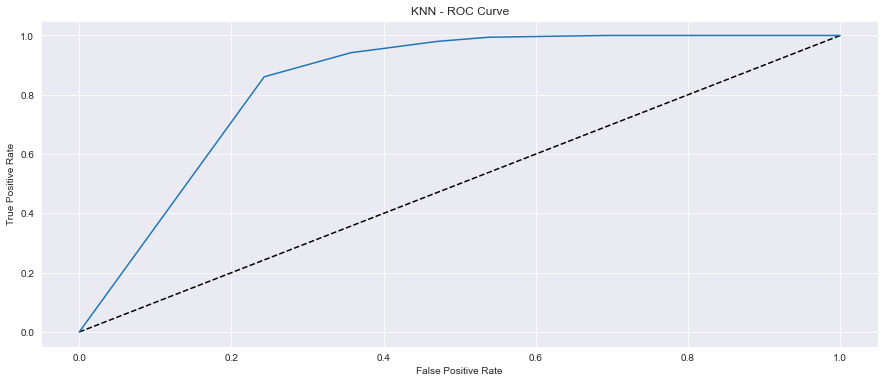

AUC Score (ROC) : 0.8445050422828201



In [27]:
knn = KNeighborsClassifier()
compute_CV(X, y, knn, 5)

# make predictions
y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

# Plot model evaluations
confusion_matrix_plot(X_train, y_train, X_test, y_test, knn,y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')

### Logistic Regression

AUC Score of 1 Fold is : 0.932735230168856
AUC Score of 2 Fold is : 0.9044318472493833
AUC Score of 3 Fold is : 0.95716390059009
AUC Score of 4 Fold is : 0.957991660152709
AUC Score of 5 Fold is : 0.8761515012955342
-----------------------------------------------
Average AUC Score of 5 Folds is : 0.9256948278913144


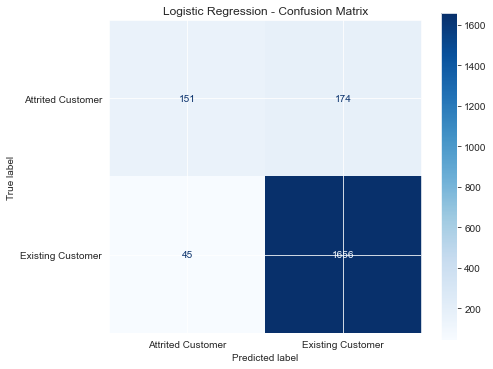

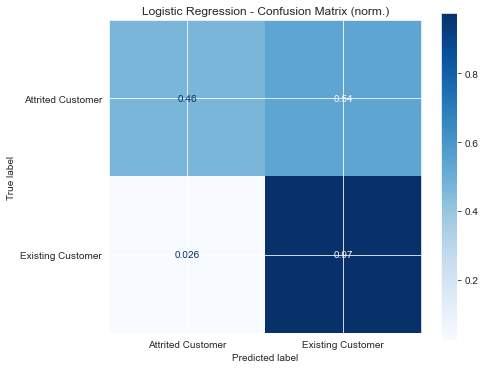

Accuracy Score Test: 0.8919052319842053
Accuracy Score Train: 0.8927292926799161 (as comparison)



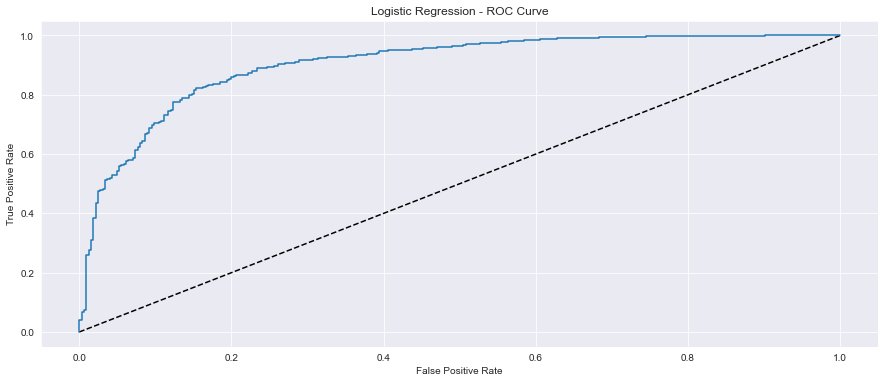

AUC Score (ROC) : 0.9029077917966806



In [28]:
logreg = LogisticRegression(max_iter=1000)
compute_CV(X, y, logreg, 5)

# make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

# Plot model evaluations
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Logistic Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Logistic Regression')

## Define a function Hyperparameter Tunning

In [29]:
def optimize(params, param_names, x, y, model):
    
    # convert params to dictionary
    params = dict(zip(param_names, params))

    # initialize model with current parameters
    if model == 'xgb':
        clf = XGBClassifier()
    
    # initialize stratified k fold
    kfold = KFold(n_splits=5)
    i = 0
    
    # initialize auc scores list
    auc_scores = []
    
    #loop over all folds
    for index in kfold.split(X = x, y = y):
        train_index, test_index = index[0], index[1]
        
        x_train = x.iloc[train_index, :]
        y_train = y[train_index]

        x_test = x.iloc[test_index, :]
        y_test = y[test_index]
        
        #fit model
        clf.fit(x_train, y_train)
        
        y_pred = clf.predict_proba(x_test)
        y_pred_pos = y_pred[:, 1]
        
        auc = roc_auc_score(y_test, y_pred_pos)
        print(f'Current parameters of fold number {i} -> {params}')
        print(f'AUC score of test {i} f {auc}')

        i += 1
        auc_scores.append(auc)
        
    return -1 * np.mean(auc_scores)

### XGBoost

In [30]:
# define a parameter space
param_spaces = [space.Integer(100, 2000, name = 'n_estimators'),
                space.Real(0.01,100, name = 'min_child_weight'),
                space.Real(0.01,1000, name = 'gamma'),
                space.Real(0.1, 1, prior = 'uniform', name = 'colsample_bytree')]

# make a list of param names this has to be same order as the search space inside the main function
param_names = ['n_estimators' ,'min_child_weight', 'gamma', 'colsample_bytree']

optimize_function = partial(optimize, param_names = param_names, x = X, y = y, model = 'xgb')

In [31]:
result = gp_minimize(optimize_function, dimensions = param_spaces, n_calls = 10, n_random_starts = 5, verbose = 10)

Iteration No: 1 started. Evaluating function at random point.
Current parameters of fold number 0 -> {'n_estimators': 1103, 'min_child_weight': 88.36398434091647, 'gamma': 395.9863568019516, 'colsample_bytree': 0.14373303926742767}
AUC score of test 0 f 0.9327570663414116
Current parameters of fold number 1 -> {'n_estimators': 1103, 'min_child_weight': 88.36398434091647, 'gamma': 395.9863568019516, 'colsample_bytree': 0.14373303926742767}
AUC score of test 1 f 0.9706881424088146
Current parameters of fold number 2 -> {'n_estimators': 1103, 'min_child_weight': 88.36398434091647, 'gamma': 395.9863568019516, 'colsample_bytree': 0.14373303926742767}
AUC score of test 2 f 0.9964534929419196
Current parameters of fold number 3 -> {'n_estimators': 1103, 'min_child_weight': 88.36398434091647, 'gamma': 395.9863568019516, 'colsample_bytree': 0.14373303926742767}
AUC score of test 3 f 0.9973146642810226
Current parameters of fold number 4 -> {'n_estimators': 1103, 'min_child_weight': 88.363984340

Current parameters of fold number 0 -> {'n_estimators': 1947, 'min_child_weight': 99.16409984580923, 'gamma': 986.9742493301279, 'colsample_bytree': 0.11032768346260942}
AUC score of test 0 f 0.9327570663414116
Current parameters of fold number 1 -> {'n_estimators': 1947, 'min_child_weight': 99.16409984580923, 'gamma': 986.9742493301279, 'colsample_bytree': 0.11032768346260942}
AUC score of test 1 f 0.9706881424088146
Current parameters of fold number 2 -> {'n_estimators': 1947, 'min_child_weight': 99.16409984580923, 'gamma': 986.9742493301279, 'colsample_bytree': 0.11032768346260942}
AUC score of test 2 f 0.9964534929419196
Current parameters of fold number 3 -> {'n_estimators': 1947, 'min_child_weight': 99.16409984580923, 'gamma': 986.9742493301279, 'colsample_bytree': 0.11032768346260942}
AUC score of test 3 f 0.9973146642810226
Current parameters of fold number 4 -> {'n_estimators': 1947, 'min_child_weight': 99.16409984580923, 'gamma': 986.9742493301279, 'colsample_bytree': 0.11032

In [32]:
best_params_xgb = dict(zip(param_names, result.x))
print(f"Best Parameters for XGBClassifier are : {best_params_xgb}")
print(f"Best AUC score {-result.fun}")

Best Parameters for XGBClassifier are : {'n_estimators': 1103, 'min_child_weight': 88.36398434091647, 'gamma': 395.9863568019516, 'colsample_bytree': 0.14373303926742767}
Best AUC score 0.9290506597820443


AUC Score of 1 Fold is : 0.9327570663414116
AUC Score of 2 Fold is : 0.9706881424088146
AUC Score of 3 Fold is : 0.9964534929419196
AUC Score of 4 Fold is : 0.9973146642810226
AUC Score of 5 Fold is : 0.7480399329370524
-----------------------------------------------
Average AUC Score of 5 Folds is : 0.9290506597820443


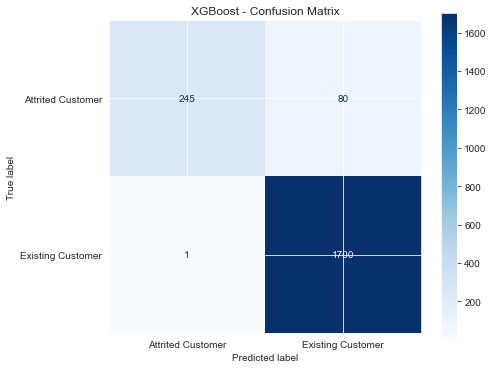

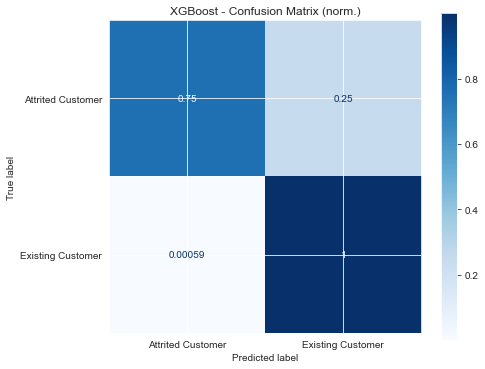

Accuracy Score Test: 0.9600197433366239
Accuracy Score Train: 0.9700037032465127 (as comparison)



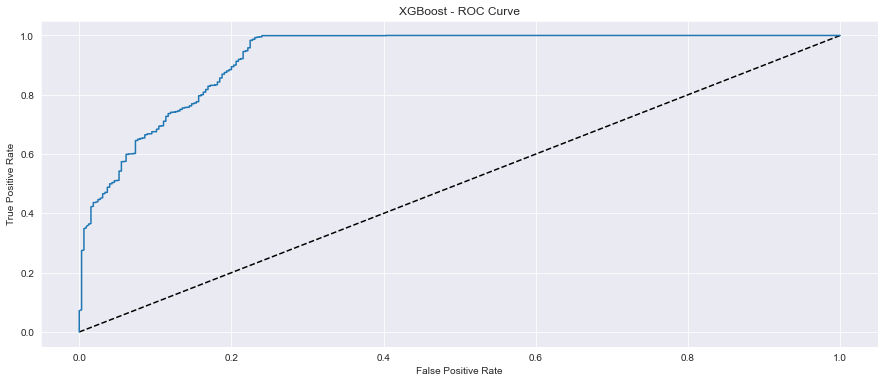

AUC Score (ROC) : 0.92776375887487



In [33]:
xgb = XGBClassifier()
compute_CV(X, y, xgb, 5)

# make predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_prob = xgb.predict_proba(X_test)

# Plot model evaluations
confusion_matrix_plot(X_train, y_train, X_test, y_test, xgb, y_pred_xgb, 'XGBoost')
roc_curve_auc_score(X_test, y_test, y_pred_xgb_prob, 'XGBoost')